# Welcome !

This may be the first time using Jupyter notebooks, a great tool for reproducible research. In addition to providing a a web application for coding in Python, Julia and R (and beyond), Jupyter notebooks allow one to directly embed:

 - text (as you may have realized already);
 - figures;
 <img src="MiCM_logo.png" width="400">
 - Equations;
 $$\large Av=\lambda v$$
 
 
 - URL links towards e.g. the [Github repository](https://github.com/DylanMannKrzisnik/MiCM_W2021_Jupyter.git) housing the scripts and data needed for this workshop;
 - and so much more, like Youtube videos, PDF documents and - more relevant to this workshop - graphs and plots for visualizing your data and results
 

In [45]:
from IPython.display import IFrame

In [52]:
IFrame('https://en.wikipedia.org/wiki/Internet_meme', width=975, height=300)

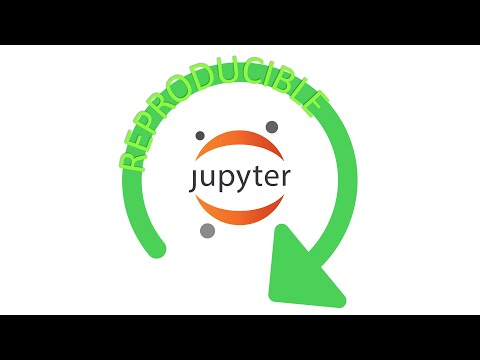

In [57]:
from IPython.display import YouTubeVideo
YouTubeVideo('-9qSUJTuec8', width=800, height=300)

## Jupyter, an interactive Python command shell (i.e. IPython)

The IPython shell offers users an interactive environment, enabling easy navigation through *directories* and access to data. We can use many of the **BASH** commands which we'd usually run in a Terminal:

<img src="BASH_terminal.png" width="800">

So, rather than listing the content of our directory by executing the *'ls'* BASH command in a Terminal, we can execute *'ls'* directly from a *code cell*:

In [ ]:
#ls

Another BASH terminal command we could try is the *cat* command to display the content of a file:

In [ ]:
#cat README.md

We can also verify the path to our current directory using *pwd*:

In [ ]:
#pwd

Create new (sub)directory "data" and list content of current directory. Note that some BASH commands such as *mkdir* must be preceded by *!*:

In [ ]:
#!mkdir data
#ls

Move EEG data into "data" subdirectory using *mv* and list content of current directory (can use tab completion). We will be using this EEG data as an exercise later on:

In [ ]:
#mv sub-010321_EC_downsamp.fdt data/
#ls

We can also use *wildcards* for referring to files with a known structure to their filename:

In [ ]:
#mv *set
#ls

Navigate to "data" using *cd* and display new location with *pwd*. Then, list content of current directory (which is now "data"):

In [ ]:
#cd data/

In [ ]:
#pwd

In [ ]:
#ls

Navigate back to previous directory and verify that now in proper directory:

In [ ]:
#cd ..
#pwd

## Let's get into some numbers

Code cells can also be used to compute mathematical expressions:

In [2]:
# 2+3

In Python, the symbol for calculating powers of a number is ** (double asterisk). We can come up with a 'funky sum':

In [ ]:
# 2**3 + 3**2

We may want to automate our funky sum by creating a dedicated function:

In [29]:
def funky_sum(x,y):
    
    '''
    With inputs x and y, the funky sum is computed as x**y + y**x.

    Parameters
    ----------
    x : first term
    y : second term
    '''
    
    z = x**y + y**x
    
    return z

In [23]:
# funky_sum(2,3)

17

In [30]:
# print(funky_sum.__doc__)


    With inputs x and y, the funky sum is computed as x**y + y**x.

    Parameters
    ----------
    x : first term
    y : second term
    


We can use *input* to query users for the value of different variables:

In [42]:
x = input('1st term of funky term: ')
y = input('2nd term of funky term: ')

x = int(x)
y = int(y)

funky_sum(x,y)

1st term of funky term: 2
2nd term of funky term: 3


17

## EEG data analysis

Import packages for analysing EEG data

In [12]:
# Must-haves
import numpy as np
import matplotlib.pyplot as plt

# EEG analysis
import mne
from mne.preprocessing import ICA
from sklearn.decomposition import PCA, FastICA
from scipy.stats import zscore
from recombinator.block_bootstrap import circular_block_bootstrap as cbb
from tensorly.tenalg import khatri_rao as kr

Import EEG data using [MNE Python](https://mne.tools/stable/index.html) analysis package. We will be using open-source data which has been reported in:
<br>
[Babayan, A., Erbey, M., Kumral, D. et al. *A mind-brain-body dataset of MRI, EEG, cognition, emotion, and peripheral physiology in young and old adults.* Sci Data 6, 180308 (2019).](https://www.nature.com/articles/sdata2018308#citeas)

In [53]:
IFrame('https://www.nature.com/articles/sdata2018308#citeas', width=975, height=300)

In [6]:
eeg = mne.io.read_raw_eeglab("sub-010321_EC_downsamp.set")

eeg.annotations.delete( np.arange( len(eeg.annotations.description) ) )  # remove annotations, not important

Reading sub-010321_EC_downsamp.fdt


<ipython-input-6-3833ed384afc>:1: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  eeg = mne.io.read_raw_eeglab("sub-010321_EC_downsamp.set")
<ipython-input-6-3833ed384afc>:1: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  eeg = mne.io.read_raw_eeglab("sub-010321_EC_downsamp.set")


Our *object* 'eeg' already has built-in functions called *methods*. For example, we can plot the data stored in 'eeg' by calling its *plot* method:

In [ ]:
#eeg.plot()

At this point, our plot is not interactive. We can change the backend of matplotlib to render interactive plots using a *magic command*.

In [7]:
%matplotlib notebook

<IPython.core.display.Javascript object>


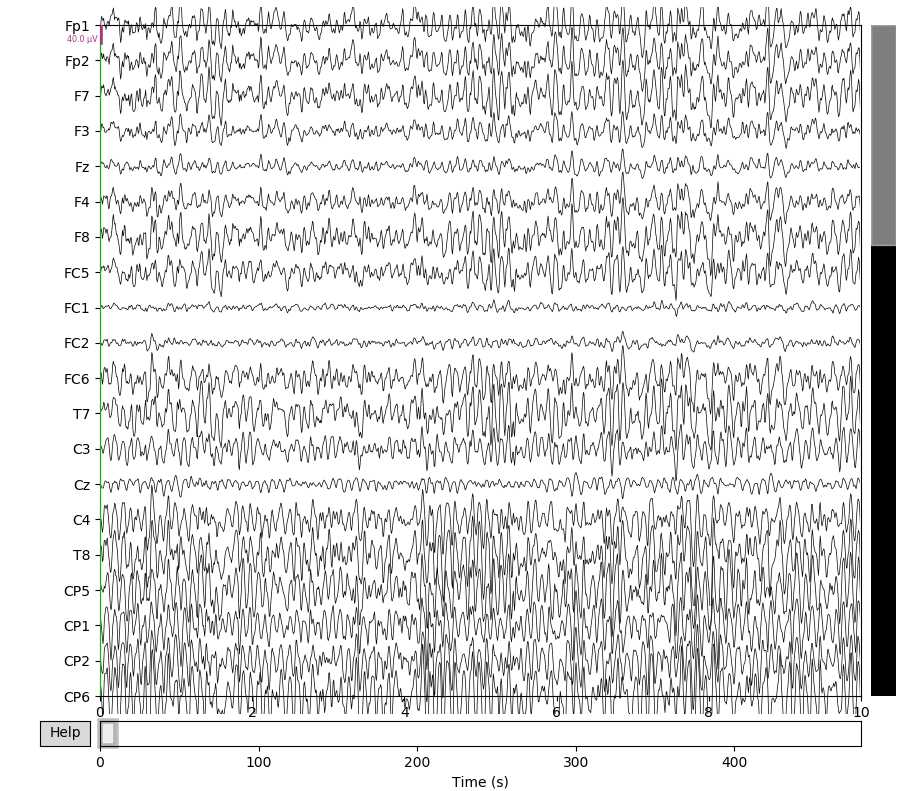

<IPython.core.display.Javascript object>


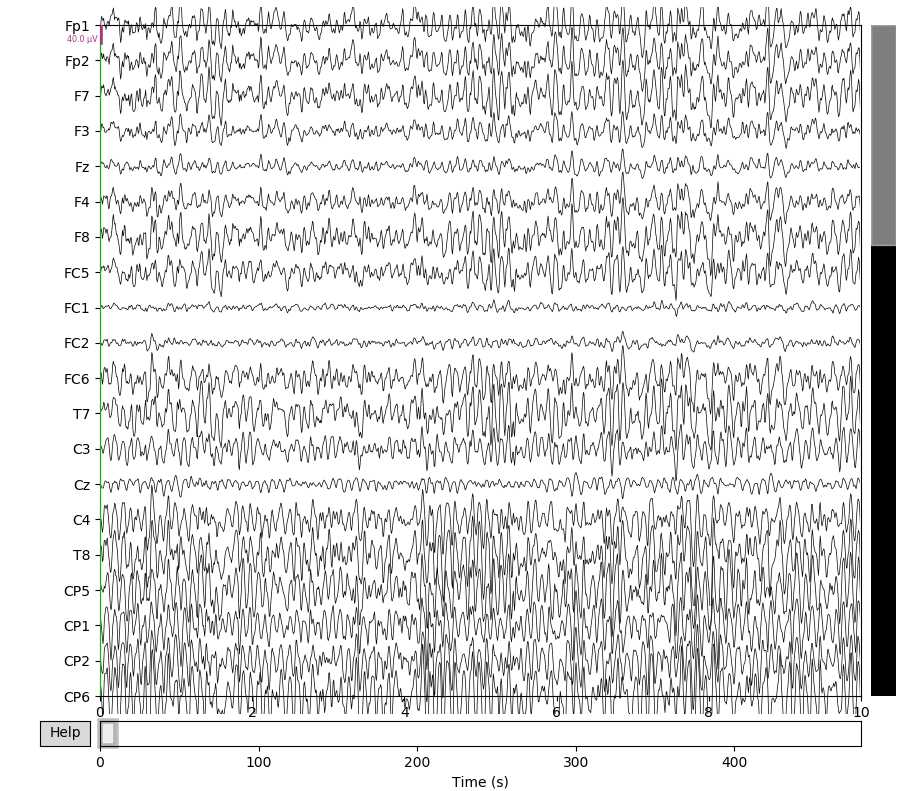

In [8]:
eeg.plot()

Perform *Independent Components Analysis* (ICA) on our EEG data:

In [13]:
ica = ICA(n_components=15, random_state=97)
ica.fit(eeg)

Fitting ICA to data using 61 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by number: 15 components
Fitting ICA took 1.0s.


<ICA | raw data decomposition, fit (fastica): 59988 samples, 15 components, channels used: "eeg">

The 'ica' object also contains its own built-in method for plotting the time-series of ICA components:

<IPython.core.display.Javascript object>


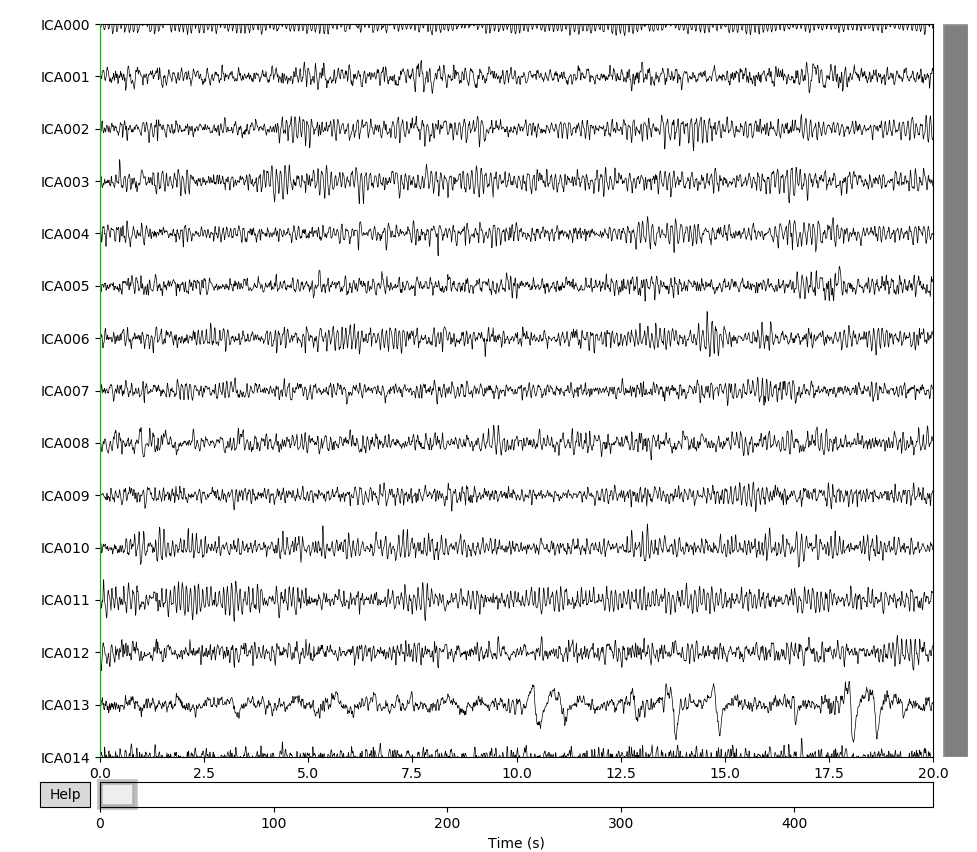

<IPython.core.display.Javascript object>


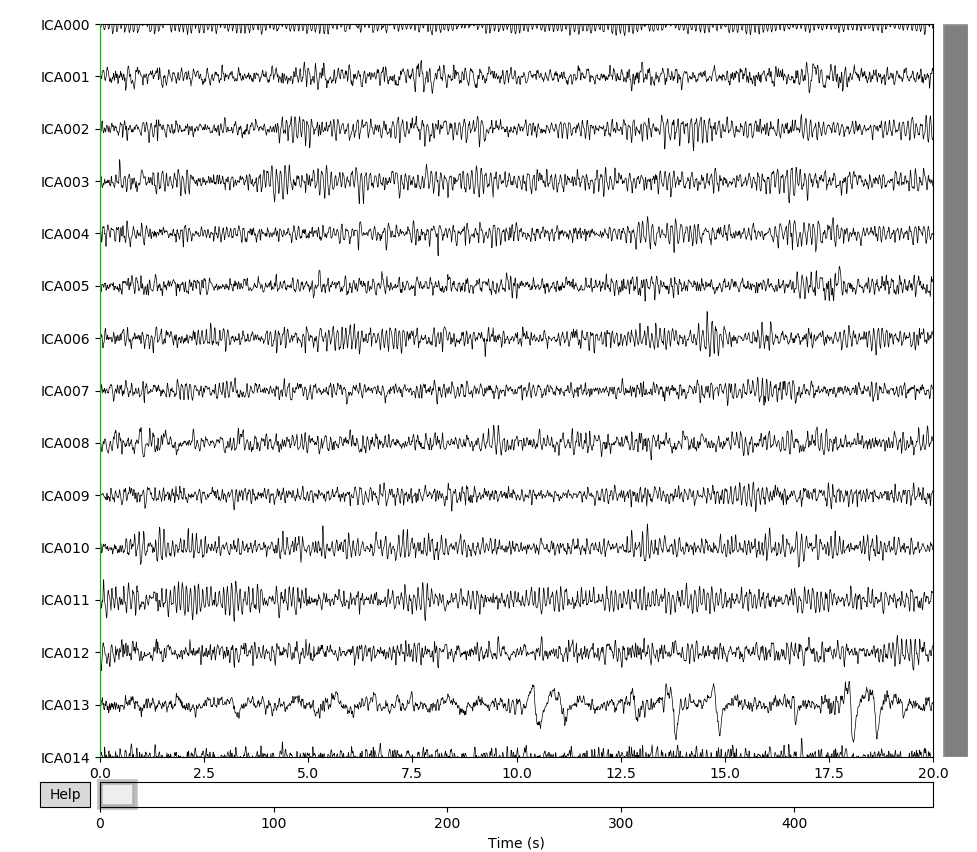

In [14]:
ica.plot_sources(eeg)

Let's also plot the *spatial topographies* of the ICA components:

<IPython.core.display.Javascript object>


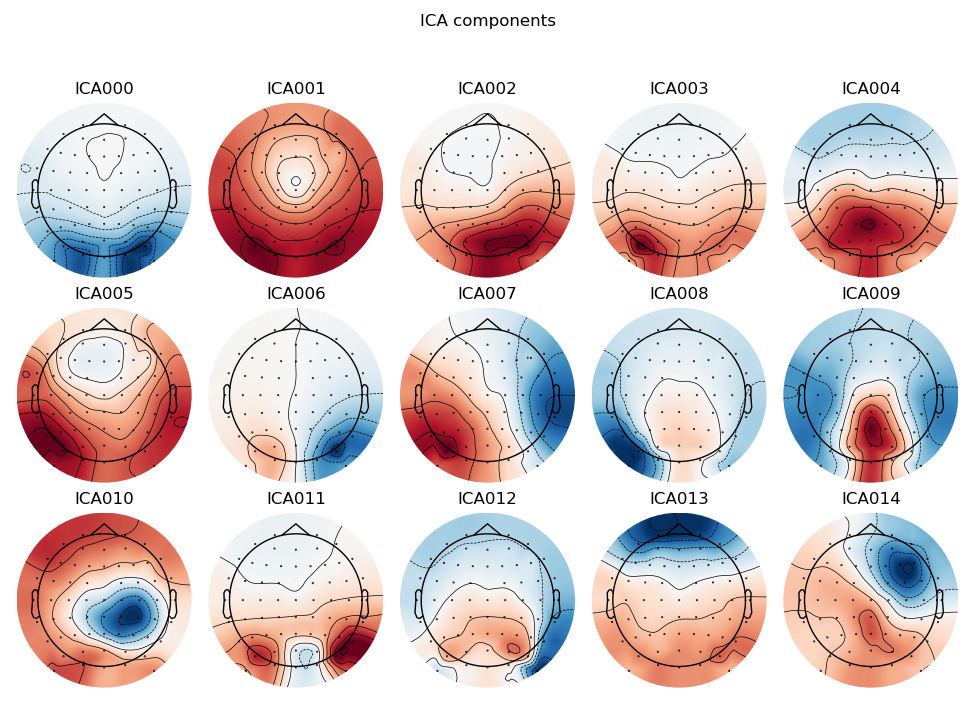

[<Figure size 975x706.5 with 15 Axes>]

In [15]:
ica.plot_components()

Now, let's also try *Principal Components Analysis* (PCA). We will need to extract the time-series from our 'eeg' object as MNE does not yet support a built-in method for PCA as it does for ICA.

In [61]:
eeg_ts = eeg.get_data().T

Let's display the shape of the EEG data using the built-in *shape* method for Numpy arrays:

In [65]:
print("Shape of EEG data: ", eeg_ts.shape)

Shape of EEG data:  (59988, 61)


In [63]:
num_comps = 15

pca = PCA(n_components=num_comps)
pca_data_ts = pca.fit_transform(eeg_ts.squeeze())

<IPython.core.display.Javascript object>


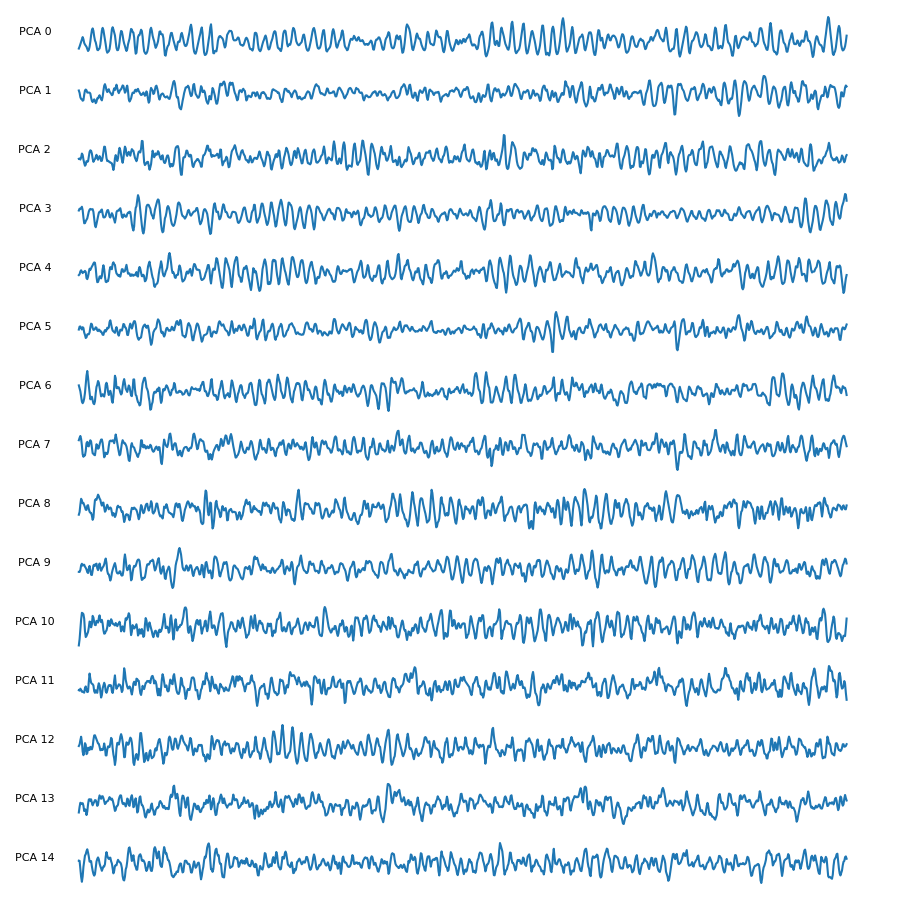

In [64]:
num_plots = pca_data_ts.shape[1]
len_plot = 1000

plt.figure(figsize=[9.,9.])
for i in range(num_plots):
    ax = plt.subplot( num_plots , 1, i+1 )
    plt.plot(zscore(pca_data_ts)[:len_plot,i])
    
    ax.set_ylabel("PCA {}".format(i), fontsize=8, rotation=0)
    ax.set_xticks([]); ax.set_yticks([])
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    
plt.show()
plt.tight_layout()

In [26]:
#%%timeit

block_len = 10000
num_boots = 50

eeg_ts_boot = cbb(eeg_ts.squeeze(), block_len, num_boots, replace=True).transpose(1,2,0)

1.06 s ± 10.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Let's plot PCA time-series before and after bootstrapping:

<IPython.core.display.Javascript object>


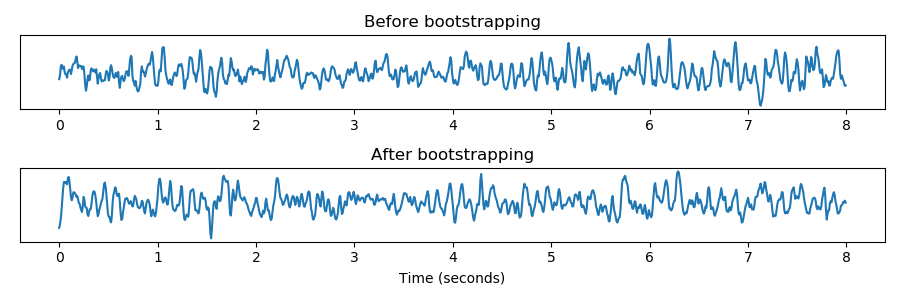

In [40]:
cmp = 0    # select which PCA component to plot
boot = 40  # select which bootstrap iteration to plot
len_plot = 1000  # choose time-series length for plotting purposes

t = np.arange(len_plot) / eeg.info['sfreq']

plt.figure(figsize=[9.,3.])
plt.subplot(2,1,1); plt.plot(t, eeg_ts[:len_plot,cmp,0]); plt.title('Before bootstrapping'); plt.yticks([])
plt.subplot(2,1,2); plt.plot(t, eeg_ts_boot[:len_plot,ts,boot]); plt.title('After bootstrapping'); plt.yticks([])  # can write commands side-by-side with ";" semi-colon seperator
plt.xlabel('Time (seconds)')

plt.show(); plt.tight_layout()

The fun part: repeat PCA on the bootstrap EEG data and apply learned PCA model on original EEG data:

In [28]:
pca_boot_ts = []

for boot in range(num_boots):
        
    pca_boot = PCA(n_components=num_comps)    
    pca_boot.fit(eeg_ts_boot[:,:,boot])                         # learn PCA model on bootstrap EEG data
    pca_boot_ts.append( pca_boot.transform(eeg_ts.squeeze()) )  # apply PCA model on original EEG data
    
pca_boot_ts = np.array(pca_boot_ts).transpose(1,2,0)

What does applying different bootstrap-based PCA models to the original EEG data look like?

<IPython.core.display.Javascript object>


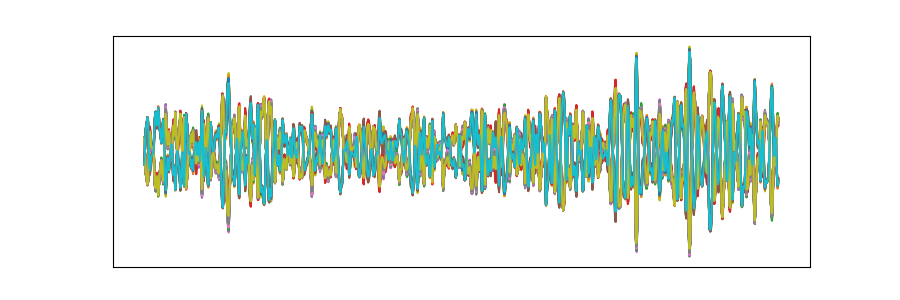

In [57]:
cmp = 1    # select which PCA component to plot

plt.figure(figsize=[9.,3.])
plt.plot(zscore(pca_boot_ts[:len_plot,cmp,:])); plt.xticks([]); plt.yticks([])
plt.show()

# save image

Seems like we should ensure that time-series are not flipped:

In [47]:
pca_boot_ts_signcorr = pca_boot_ts.copy()

for i in range(pca_data_ts.shape[-1]):
    signs = np.corrcoef( pca_data_ts[:,i] , pca_boot_ts[:,i,:].squeeze() , rowvar=False )[0,1:]
    pca_boot_ts_signcorr[:,i,:] = kr([ signs[None] , pca_boot_ts[:,i,:].squeeze() ])

Plot again:

<IPython.core.display.Javascript object>


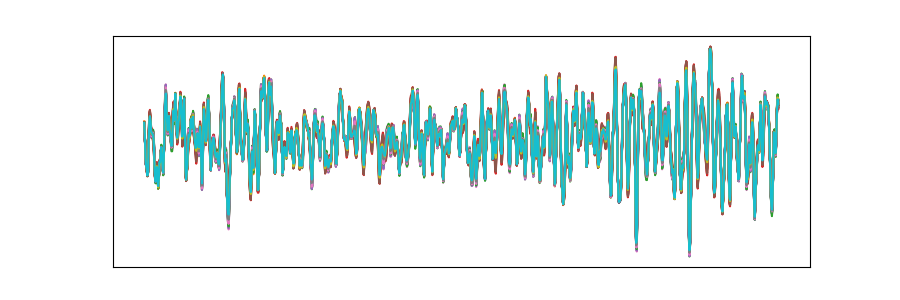

In [58]:
cmp = 1    # select which PCA component to plot

plt.figure(figsize=[9.,3.])
plt.plot(zscore(pca_boot_ts_signcorr[:len_plot,cmp,:])); plt.xticks([]); plt.yticks([])
plt.show()

Let's now compute the mean and standard deviation across bootstrap iterations for each PCA component:

In [53]:
mean_boot_ts = np.mean(pca_boot_ts_signcorr, axis=2)
std_boot_ts = np.std(pca_boot_ts_signcorr, axis=2)

And now plot PCA time-series with bootstrap-based *confidence intervals*:

<IPython.core.display.Javascript object>


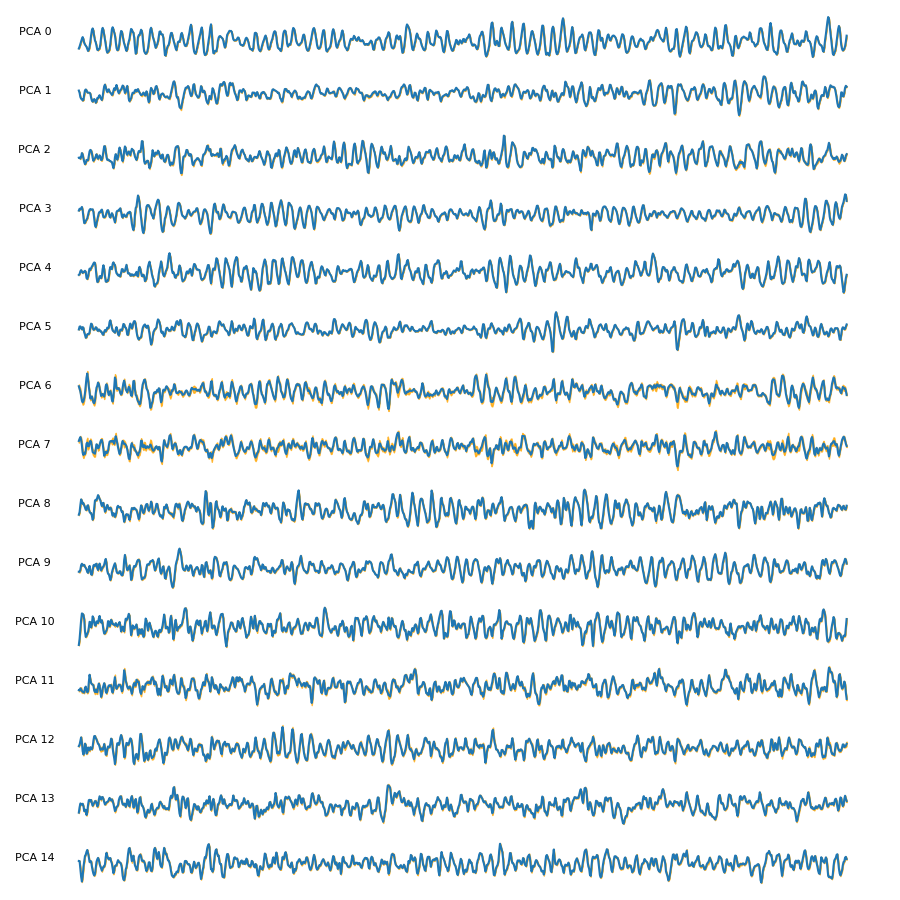

In [56]:
len_plot = 1000  # choose time-series length for plotting purposes

t = np.arange(len_plot)
plt.figure(figsize=[9.,9.])

for i in range(num_comps):
    
    y = mean_boot_ts[:len_plot,i]
    ci = std_boot_ts[:len_plot,i]
    
    ax = plt.subplot( num_plots , 1, i+1 )
    plt.fill_between(t, (y-ci), (y+ci), color='orange', alpha=0.75)
    plt.plot(t, y)
    
    ax.set_ylabel("PCA {}".format(i), fontsize=8, rotation=0)
    ax.set_xticks([]); ax.set_yticks([])
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)

plt.show()
plt.tight_layout()

## Display Python package versions

Load **watermark** which will allow us to display package versions:

In [52]:
%load_ext watermark

Display package versions. Should be the same as in the [requirements.txt](https://github.com/DylanMannKrzisnik/MiCM_W2021_Jupyter/blob/main/requirements.txt) file located within the Github repository:

In [54]:
%watermark --iversions
%watermark -p scipy,recombinator,watermark

numpy     : 1.19.5
matplotlib: 3.1.1
mne       : 0.21.dev0

scipy       : 1.4.1
recombinator: 0.0.4
watermark   : 2.2.0

